In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


import shap
%matplotlib inline

# Load in dataset

In [2]:
df = pd.read_excel('Credit_Data__2_.xls', sheet_name=0)
df.head()

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,DEFAULT
0,1,0,6,4,0,0,0,1,0,0,...,67,0,0,1,2,2,1,1,0,0
1,2,1,48,2,0,0,0,1,0,0,...,22,0,0,1,1,2,1,0,0,1
2,3,3,12,4,0,0,0,0,1,0,...,49,0,0,1,1,1,2,0,0,0
3,4,0,42,2,0,0,1,0,0,0,...,45,0,0,0,1,2,2,0,0,0
4,5,0,24,3,1,0,0,0,0,0,...,53,0,0,0,2,2,2,0,0,1


# Get summary statistics

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   OBS#              1000 non-null   int64
 1   CHK_ACCT          1000 non-null   int64
 2   DURATION          1000 non-null   int64
 3   HISTORY           1000 non-null   int64
 4   NEW_CAR           1000 non-null   int64
 5   USED_CAR          1000 non-null   int64
 6   FURNITURE         1000 non-null   int64
 7   RADIO/TV          1000 non-null   int64
 8   EDUCATION         1000 non-null   int64
 9   RETRAINING        1000 non-null   int64
 10  AMOUNT            1000 non-null   int64
 11  SAV_ACCT          1000 non-null   int64
 12  EMPLOYMENT        1000 non-null   int64
 13  INSTALL_RATE      1000 non-null   int64
 14  MALE_DIV          1000 non-null   int64
 15  MALE_SINGLE       1000 non-null   int64
 16  MALE_MAR_or_WID   1000 non-null   int64
 17  CO-APPLICANT      1000 non-null   

In [4]:
df.describe()

,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,DEFAULT
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,1.577000,20.903000,2.54500,0.234000,0.103000,0.181000,0.280000,0.050000,0.097000,...,35.546000,0.186000,0.179000,0.713000,1.407000,1.904000,1.155000,0.404000,0.037000,0.300000
std,288.819436,1.257638,12.058814,1.08312,0.423584,0.304111,0.385211,0.449224,0.218054,0.296106,...,11.375469,0.389301,0.383544,0.452588,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,0.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,250.750000,0.000000,12.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,27.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,500.500000,1.000000,18.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,33.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,750.250000,3.000000,24.000000,4.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,42.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000
max,1000.000000,3.000000,72.000000,4.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,75.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000


In [5]:
# Create list of categorical variables
cat_vars = ['CHK_ACCT', 'HISTORY', 'SAV_ACCT', 'EMPLOYMENT', 'PRESENT_RESIDENT', 'JOB']

# Create list of boolean variables
bool_vars = ['NEW_CAR', 'USED_CAR', 'FURNITURE', 'RADIO/TV', 'EDUCATION', 'RETRAINING', 'MALE_DIV', 'MALE_SINGLE', 
             'MALE_MAR_or_WID', 'CO-APPLICANT', 'GUARANTOR', 'REAL_ESTATE', 'PROP_UNKN_NONE', 'OTHER_INSTALL', 
             'RENT', 'OWN_RES', 'TELEPHONE', 'FOREIGN']

# Exploratory Data Analysis

In [6]:
def plot_vars(df):
    for col in df.columns:
        fig, axes = plt.subplots(1, 2)
        sns.countplot(data=df, ax=axes[0], x=col, hue='DEFAULT', palette='twilight')
        sns.violinplot(data=df, ax=axes[1], x=col, hue='DEFAULT', palette='twilight')

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.


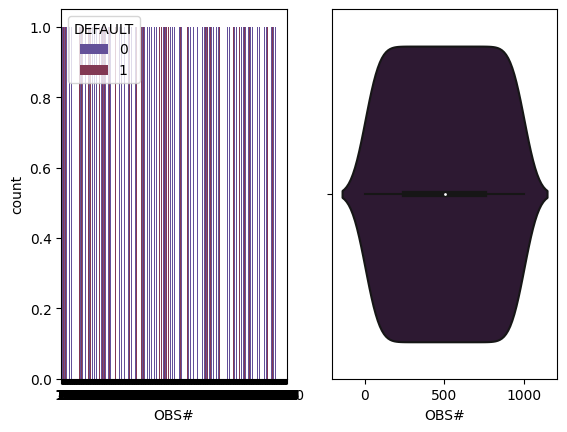

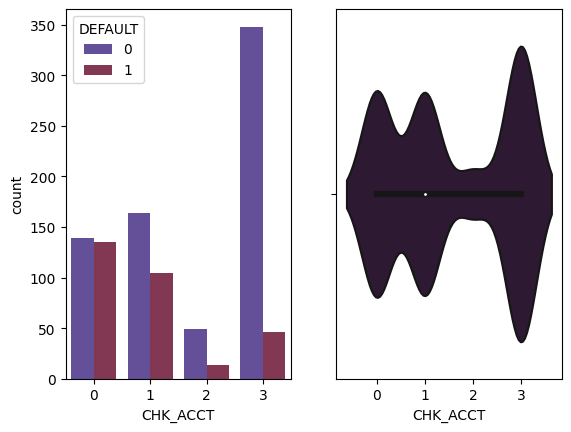

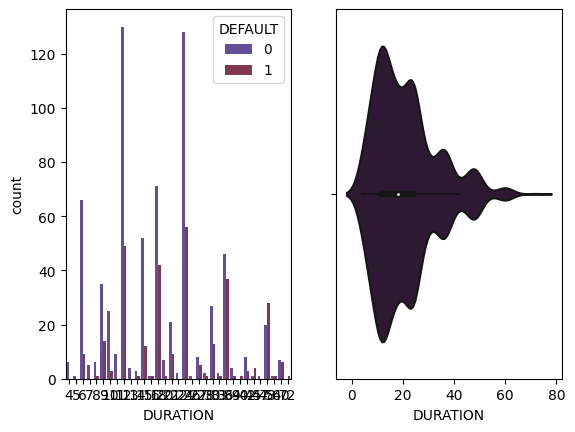

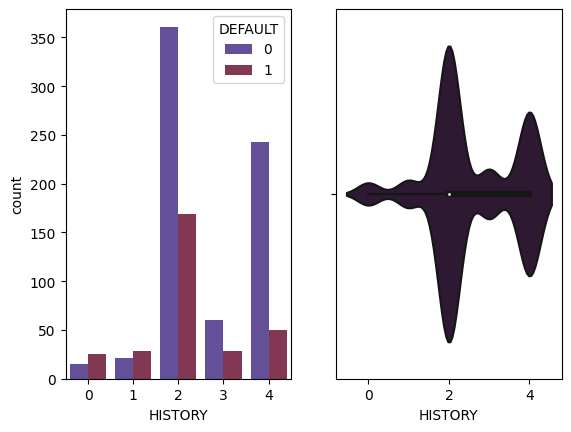

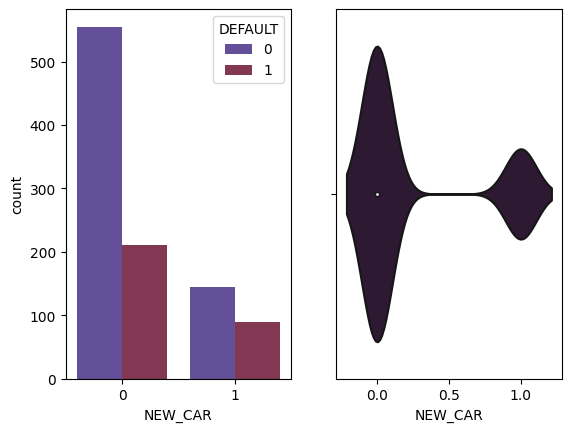

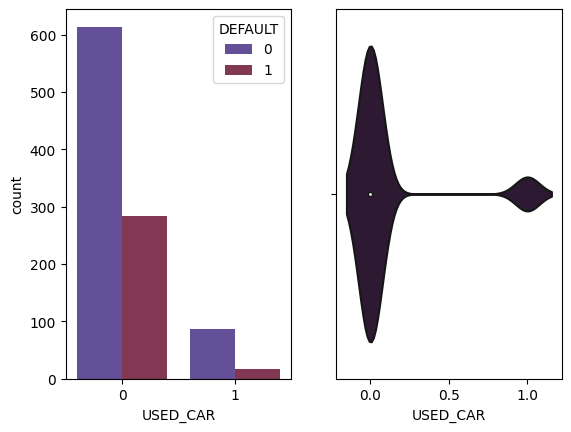

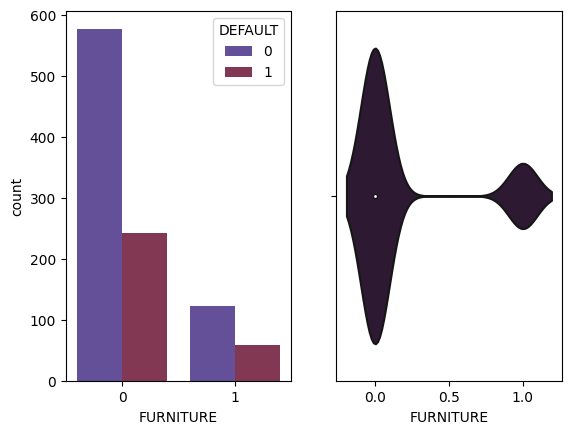

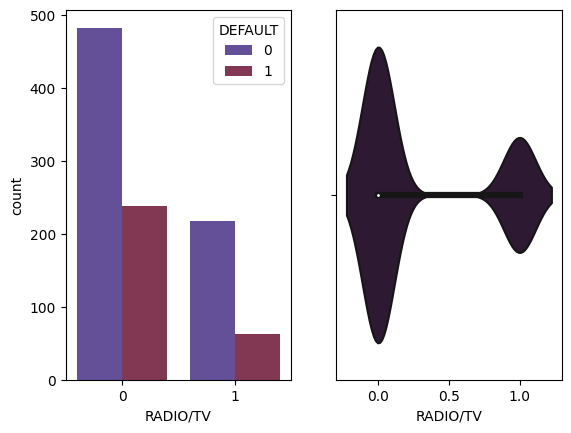

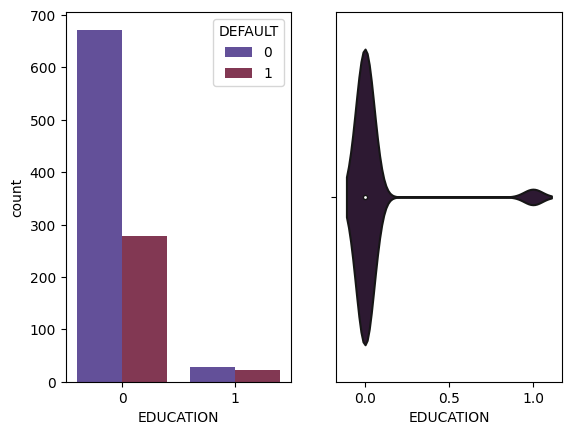

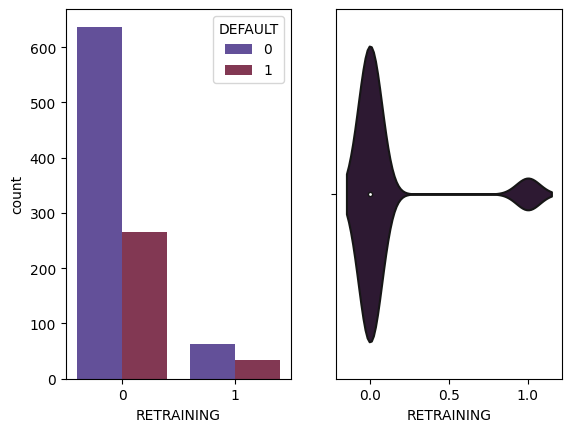

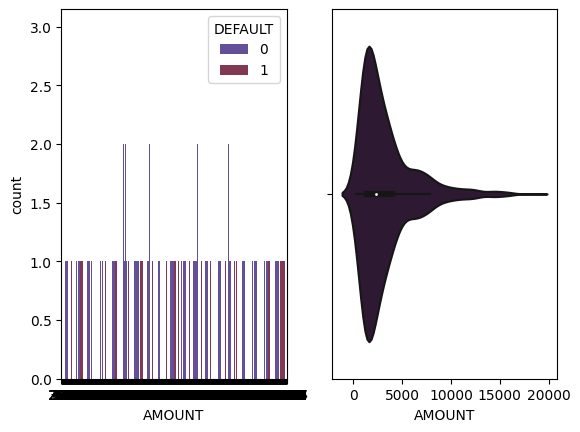

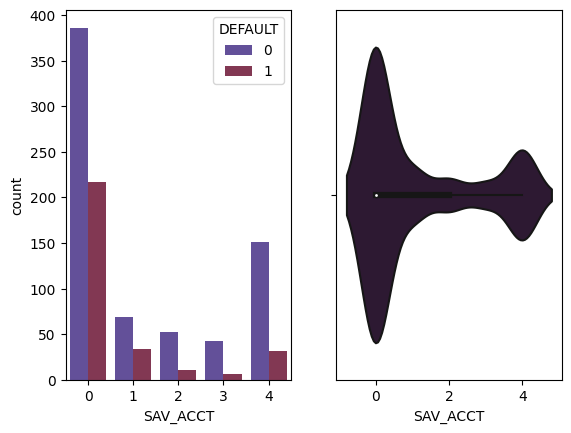

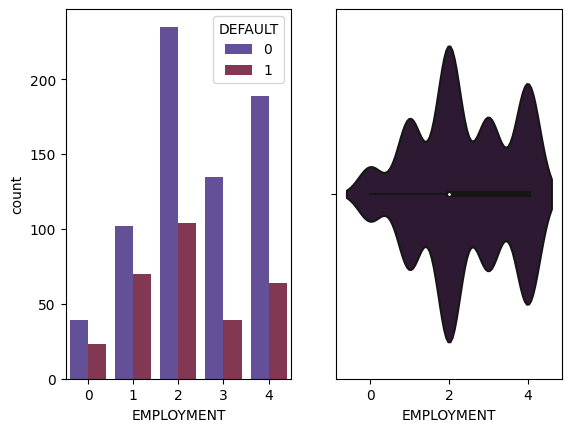

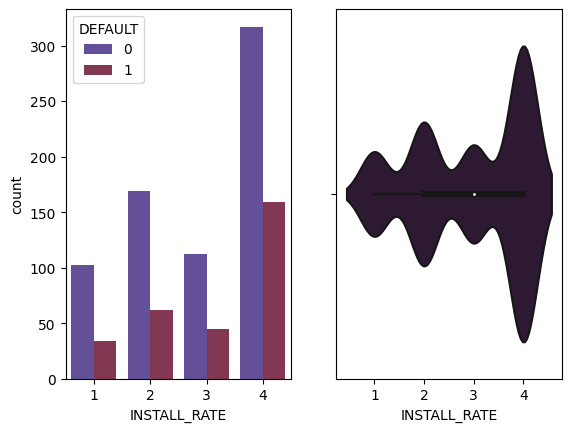

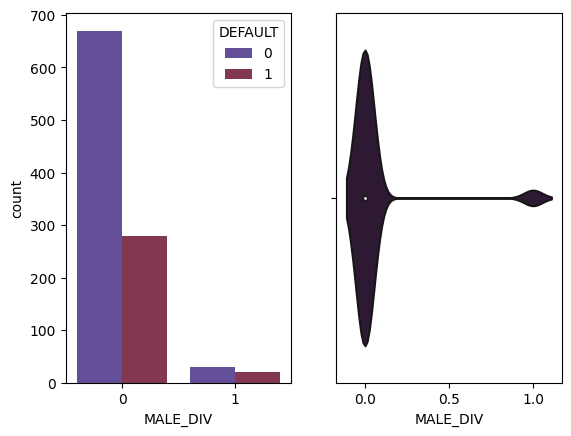

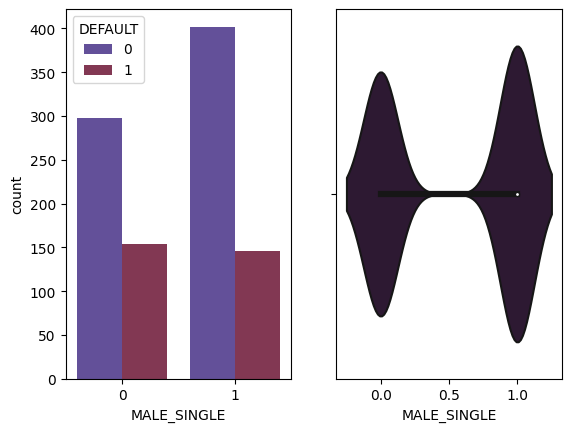

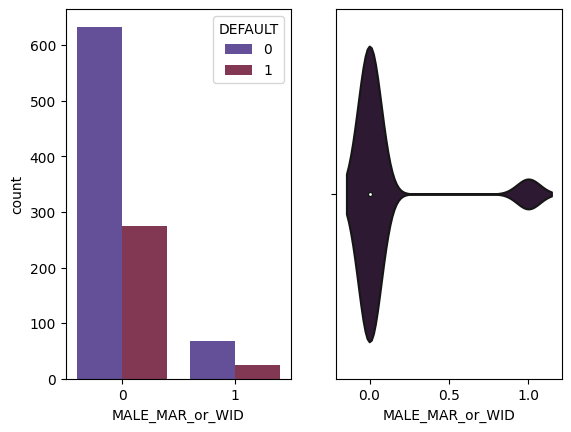

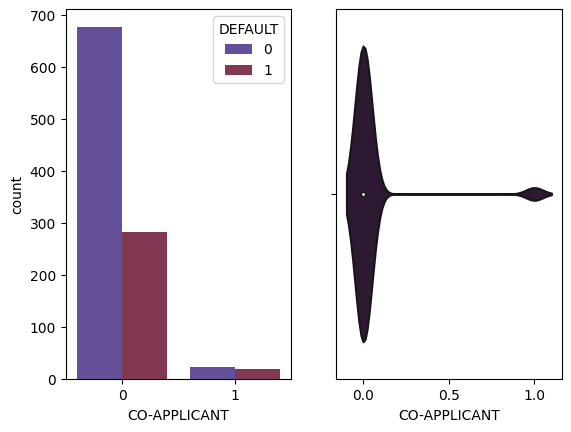

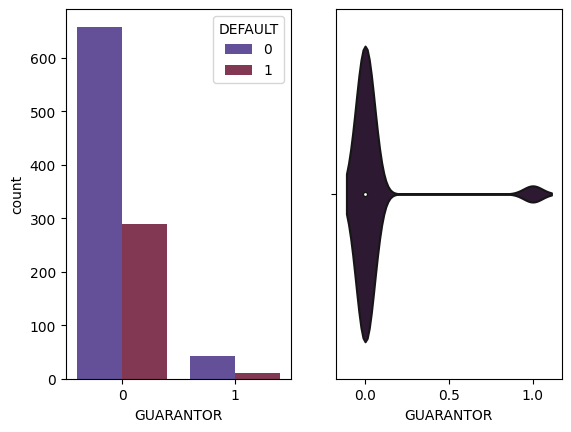

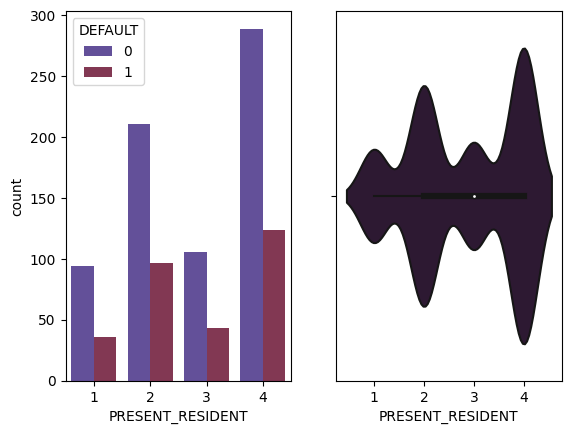

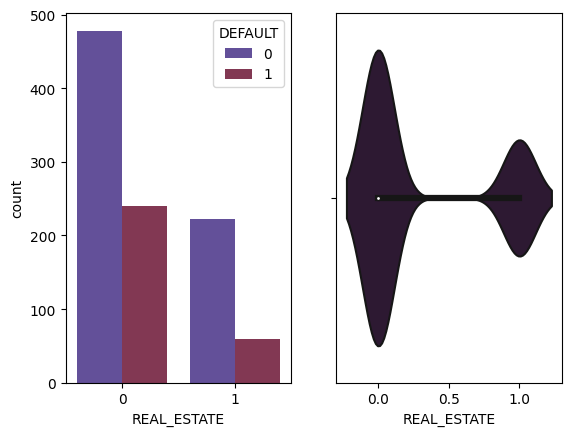

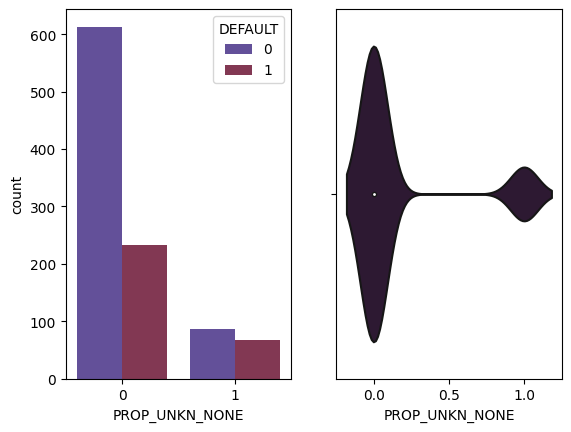

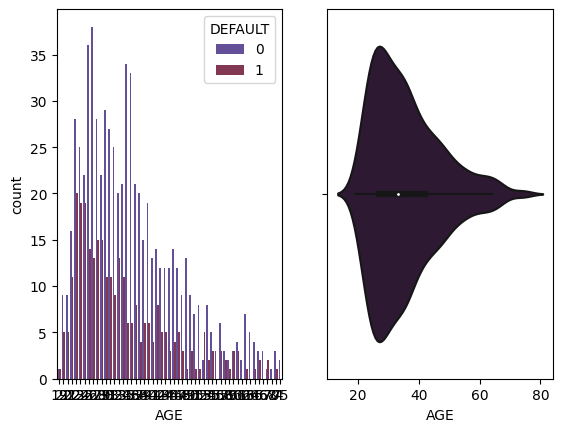

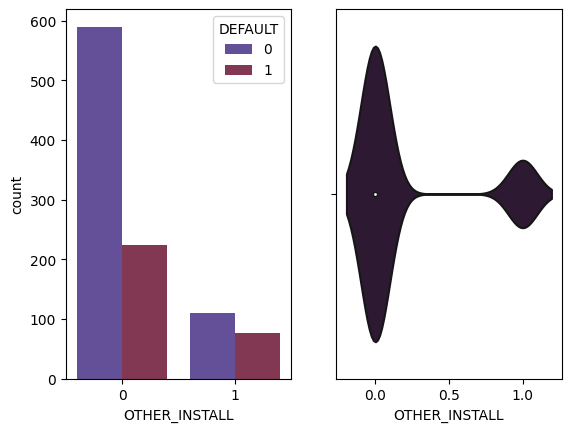

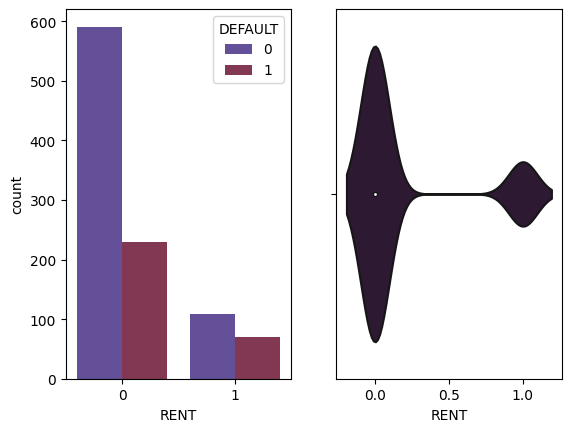

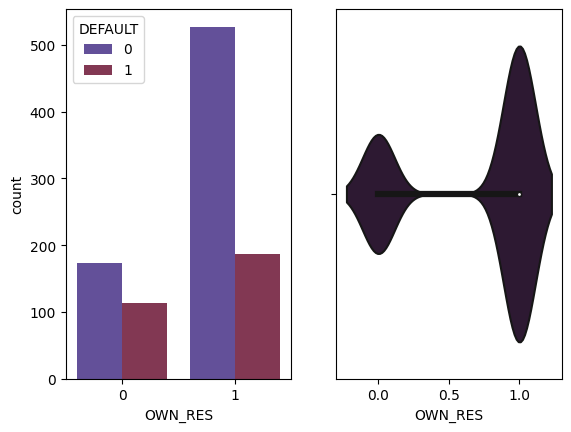

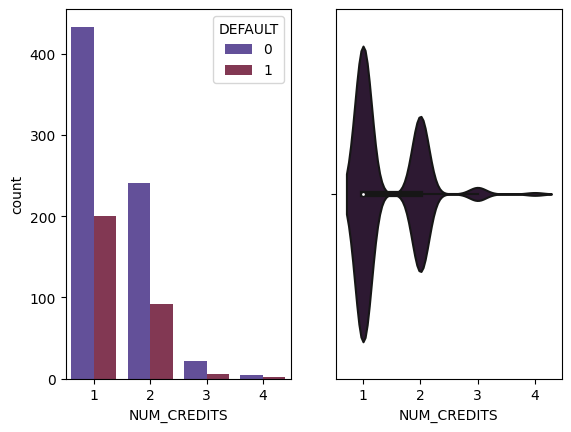

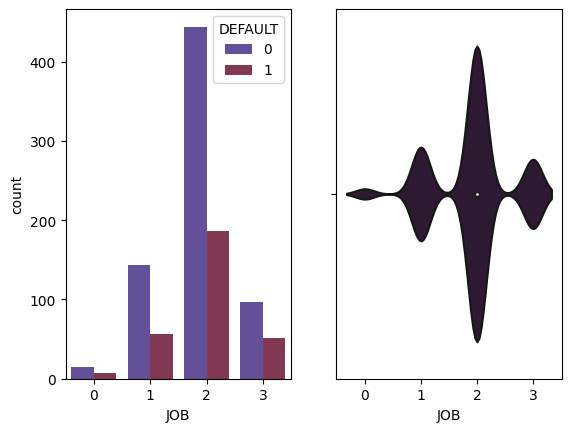

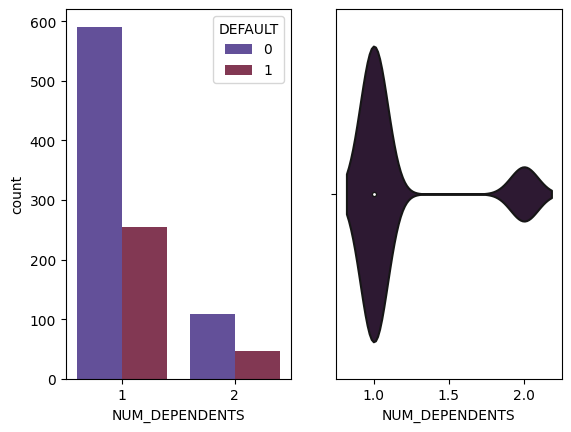

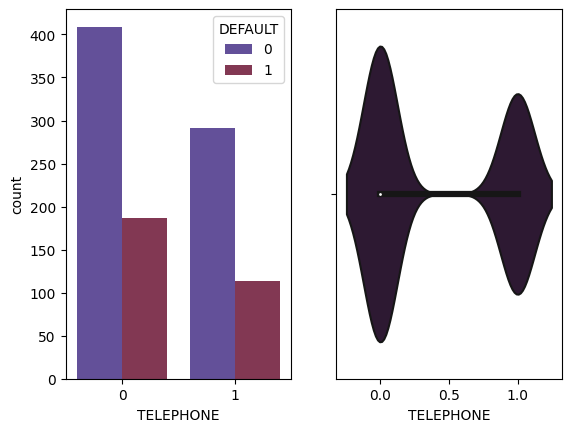

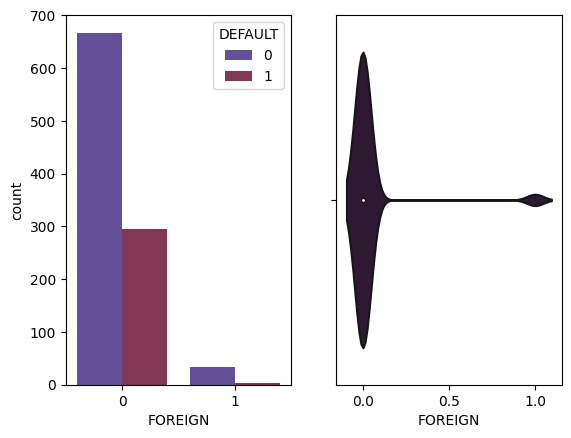

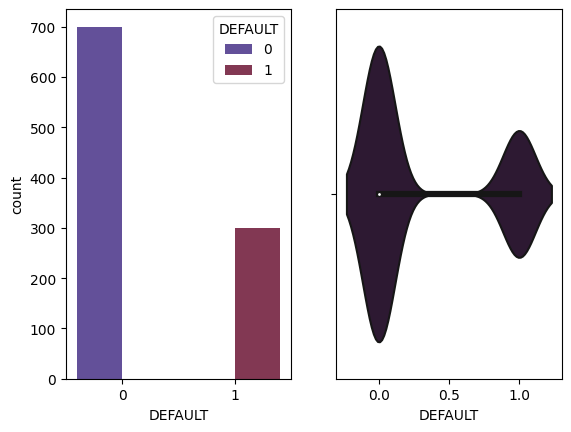

In [7]:
plot_vars(df)

<Axes: xlabel='AgeBin', ylabel='count'>

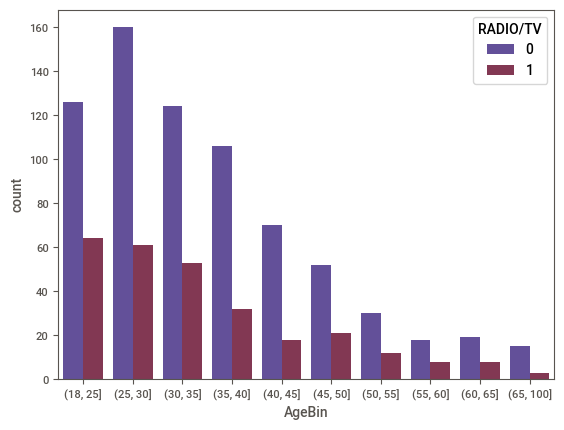

In [43]:
# RADIO/TV by AgeBin
sns.countplot(data=df, x='AgeBin', hue='RADIO/TV', palette='twilight')

<Axes: xlabel='AgeBin', ylabel='count'>

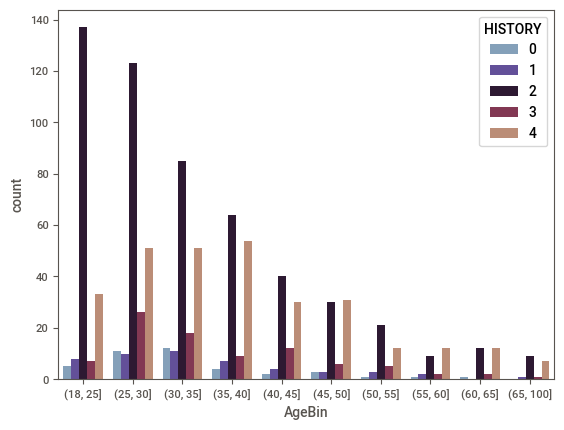

In [44]:
# HISTORY by AgeBin
sns.countplot(data=df, x='AgeBin', hue='HISTORY', palette='twilight')

<Axes: >

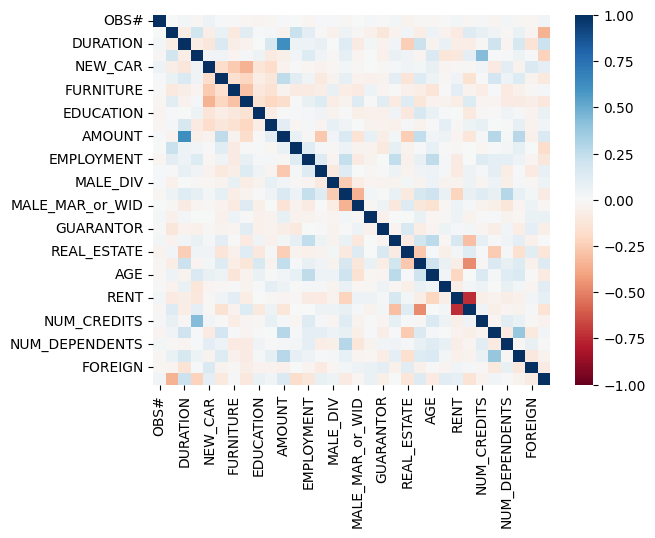

In [8]:
# Look at correlations
plt.tight_layout()
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='RdBu')

                                             |                                                                …


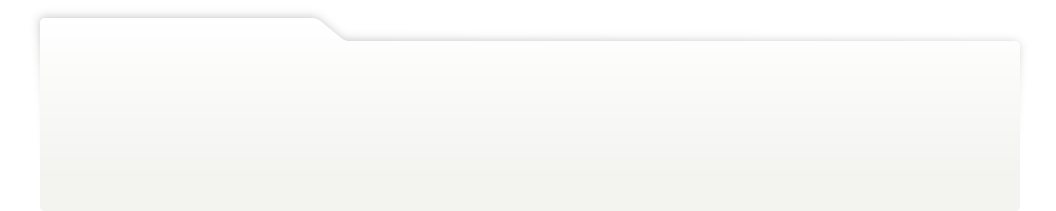
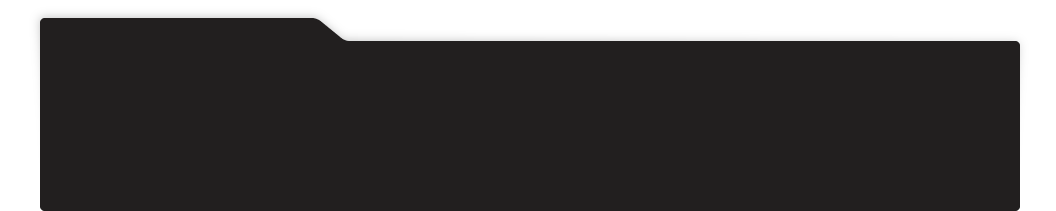
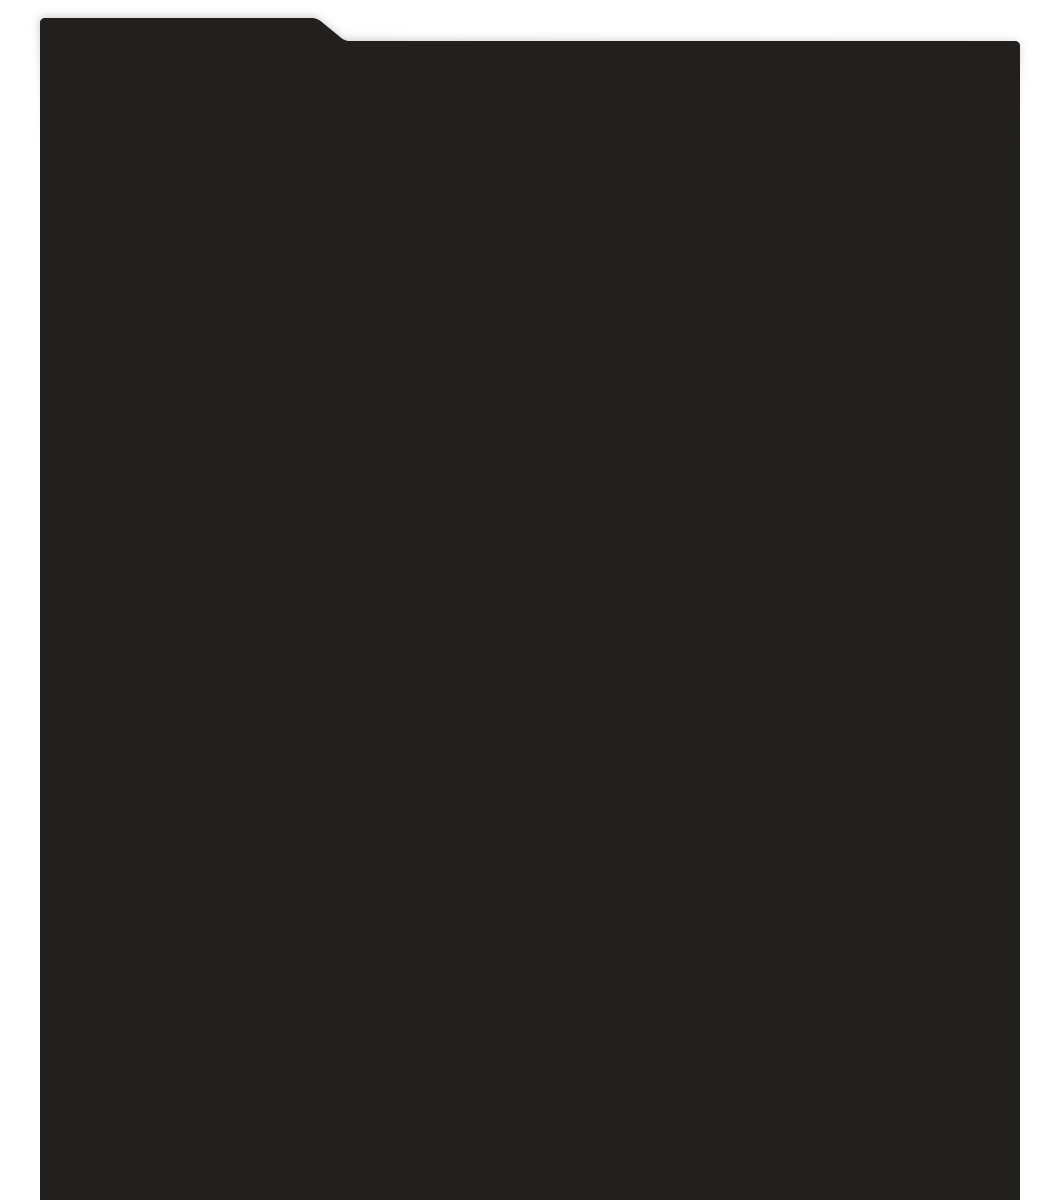
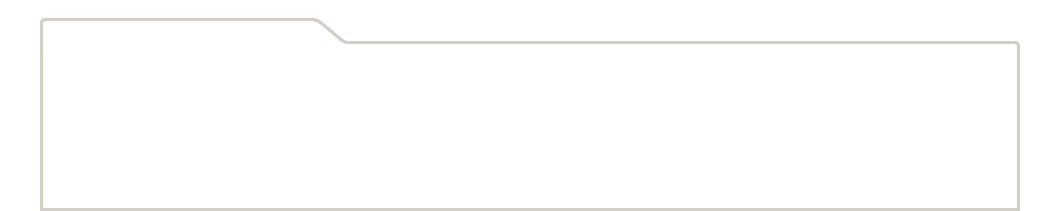
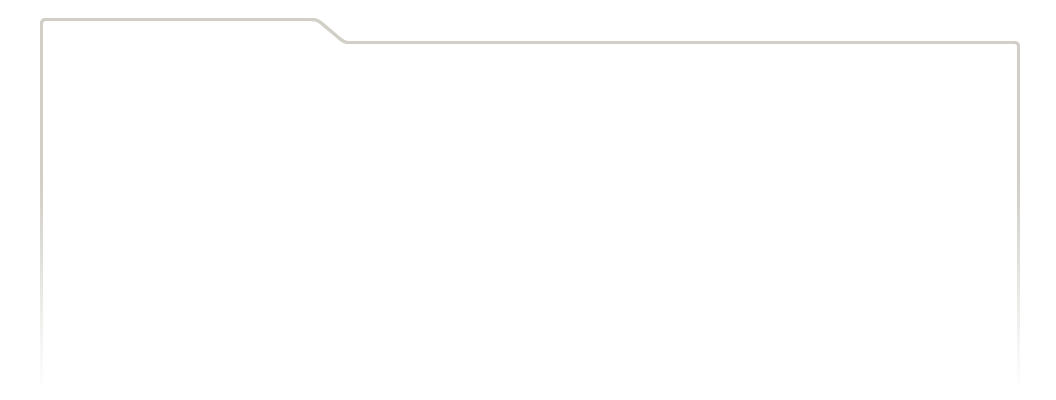
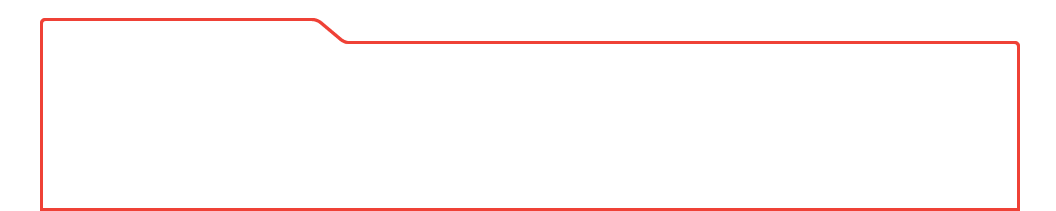
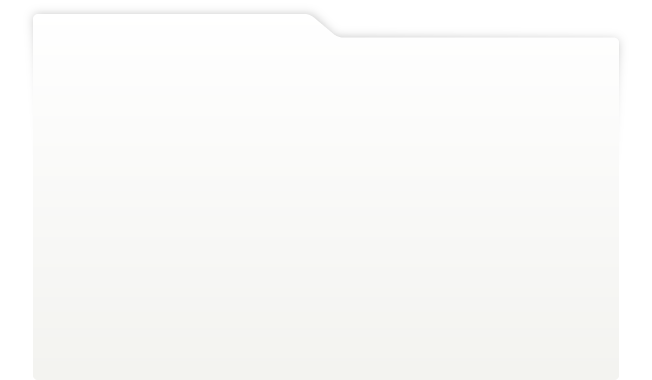
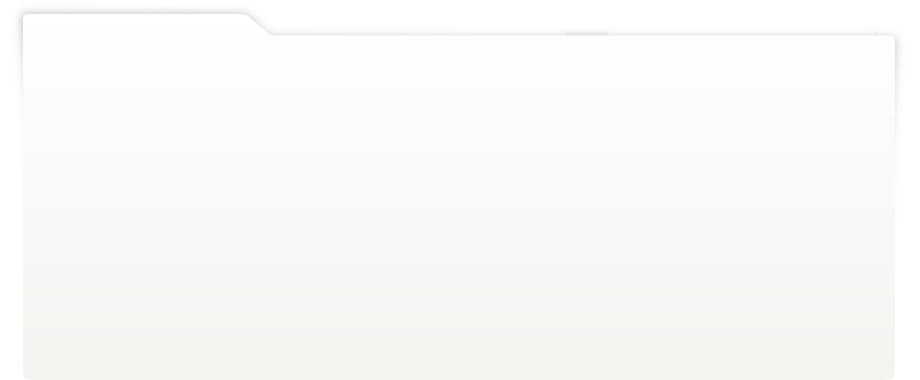
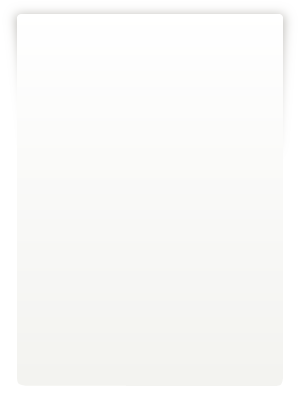
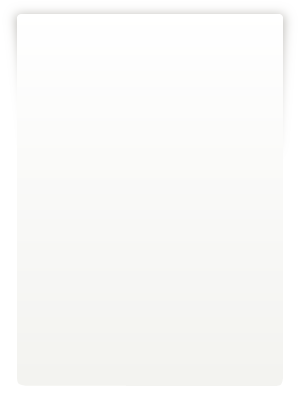
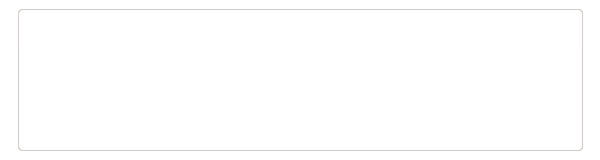
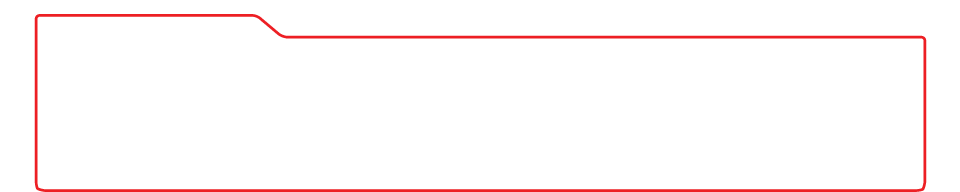
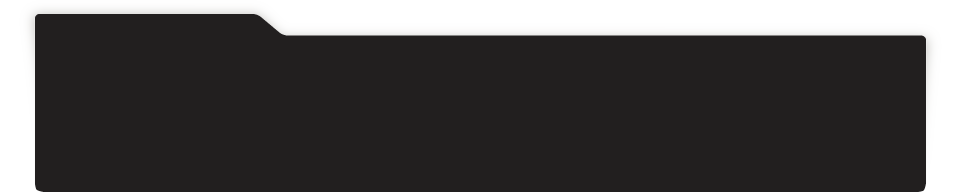
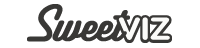
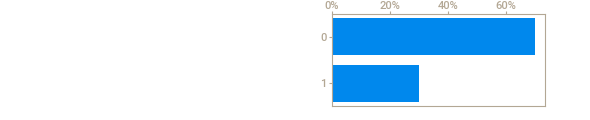
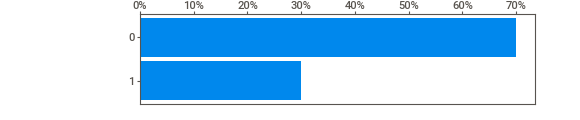
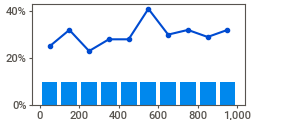
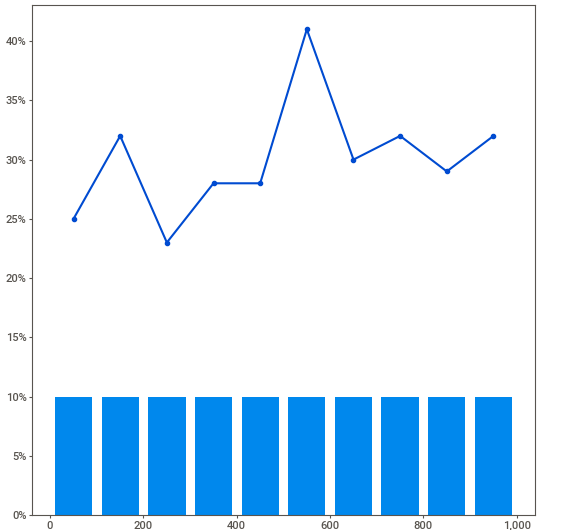
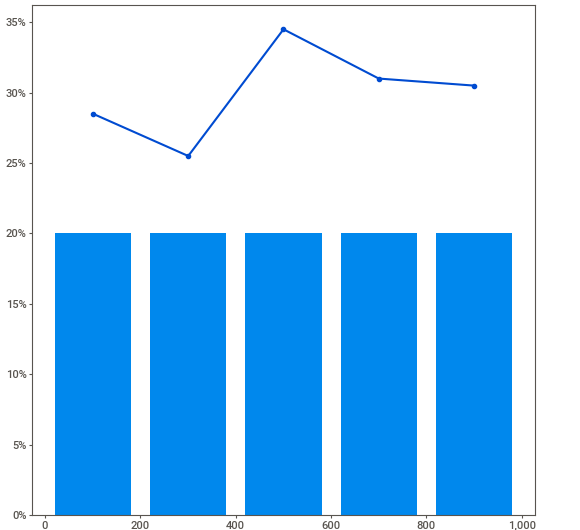
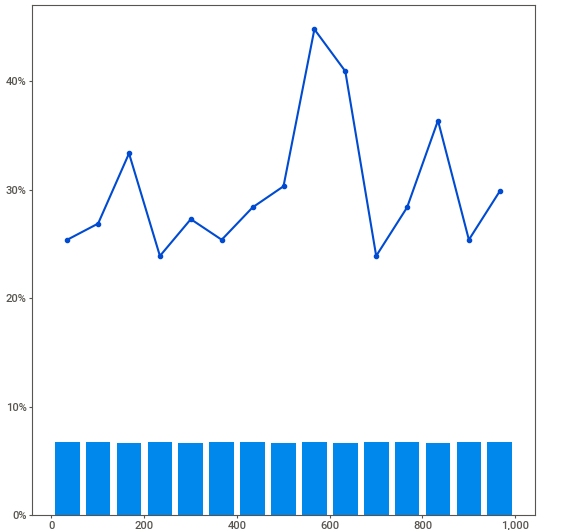
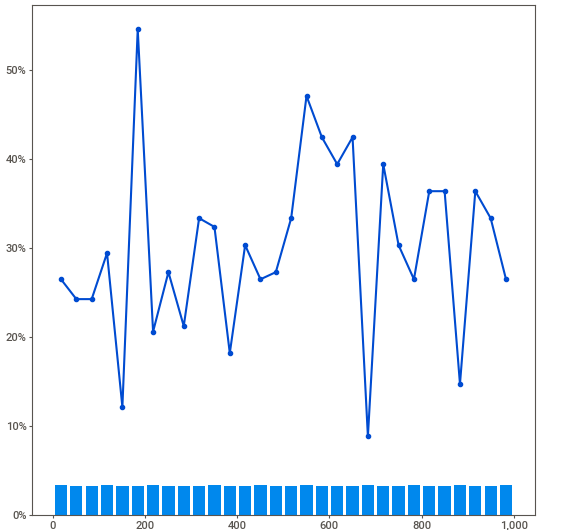
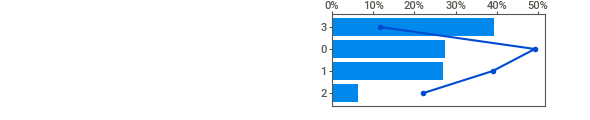
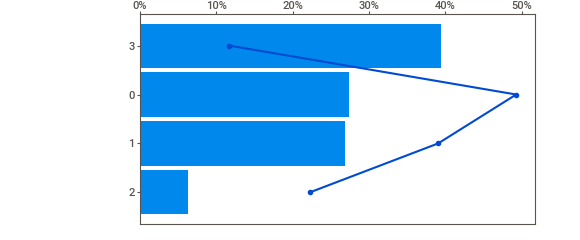
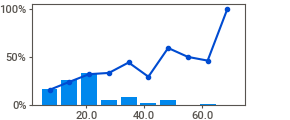
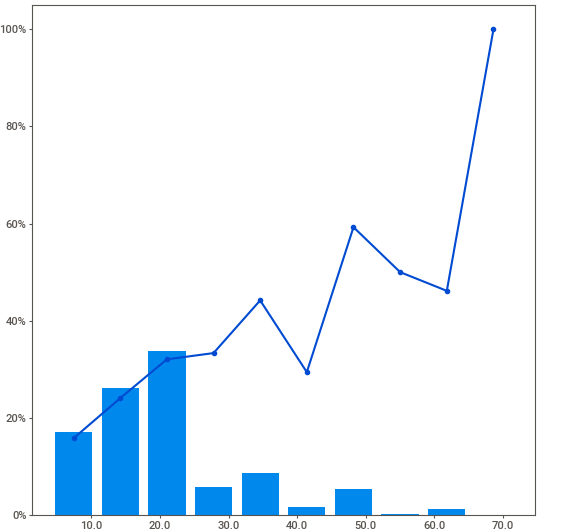
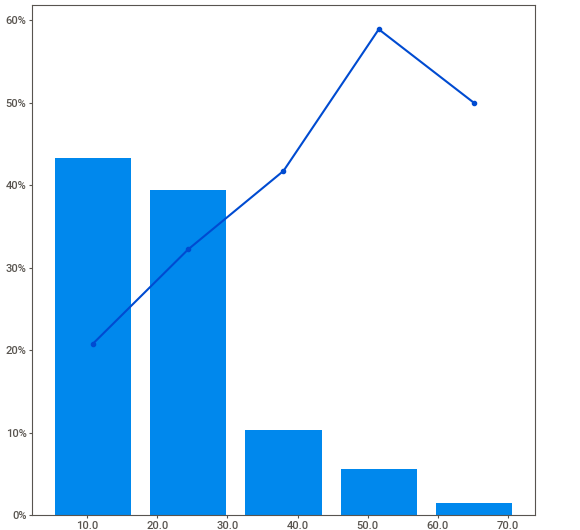
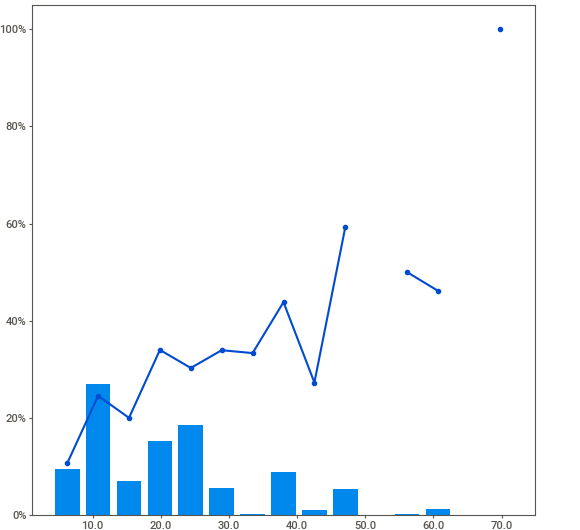
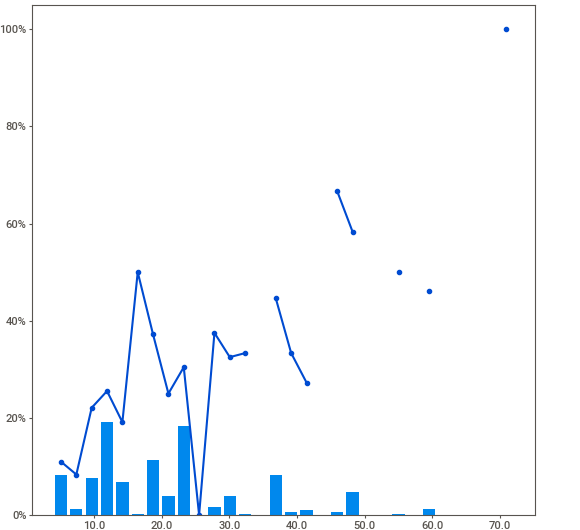
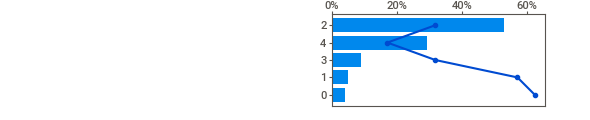
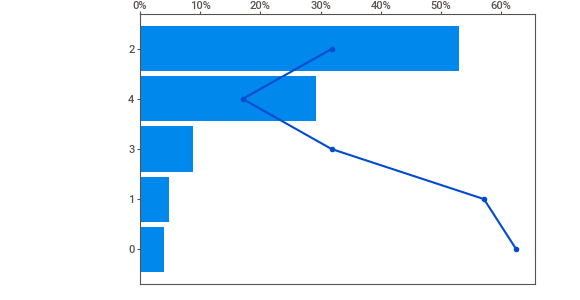
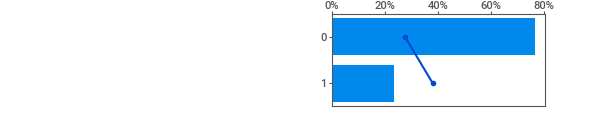
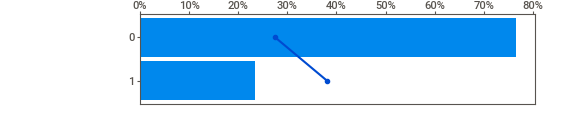
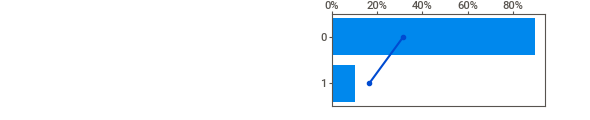
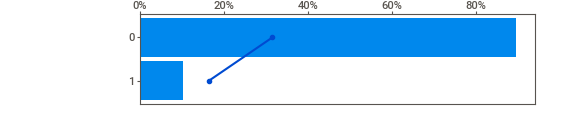
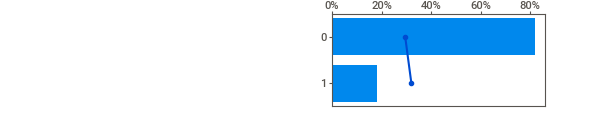
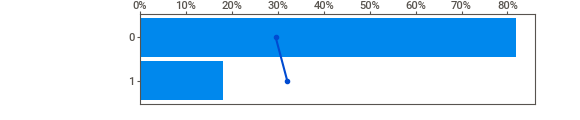
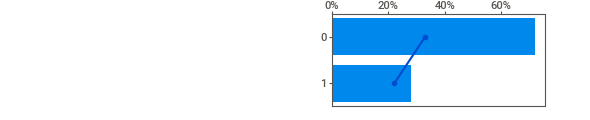
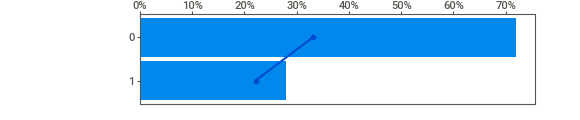
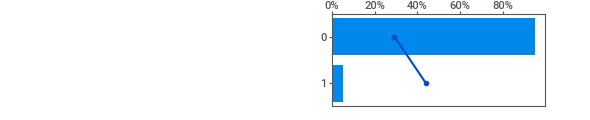
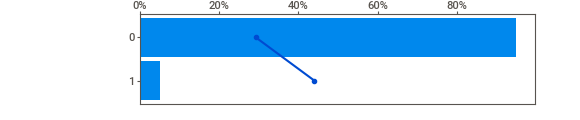
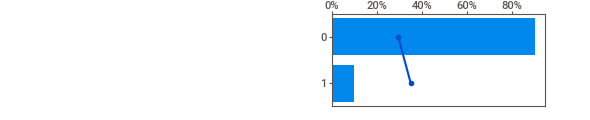
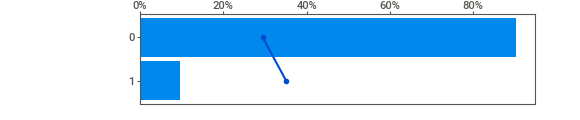
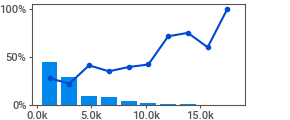
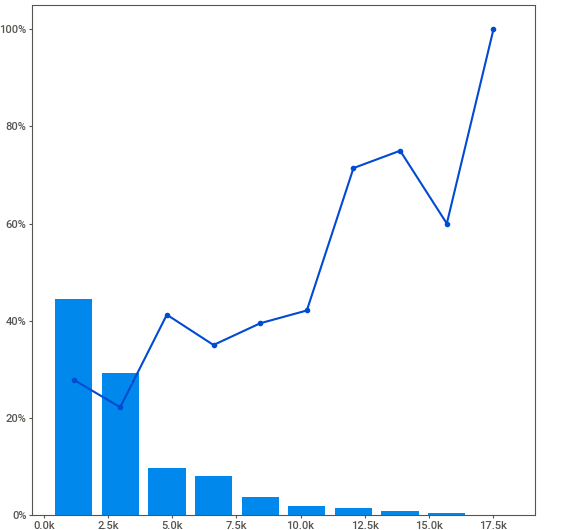
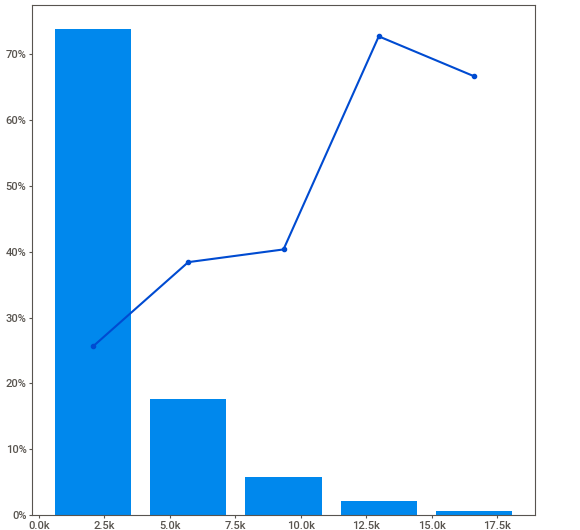
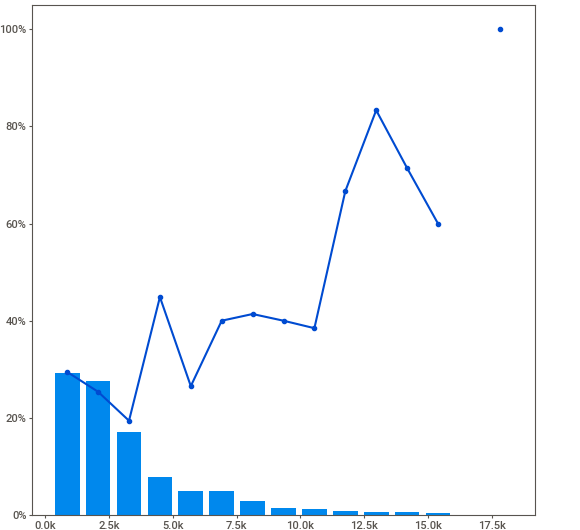
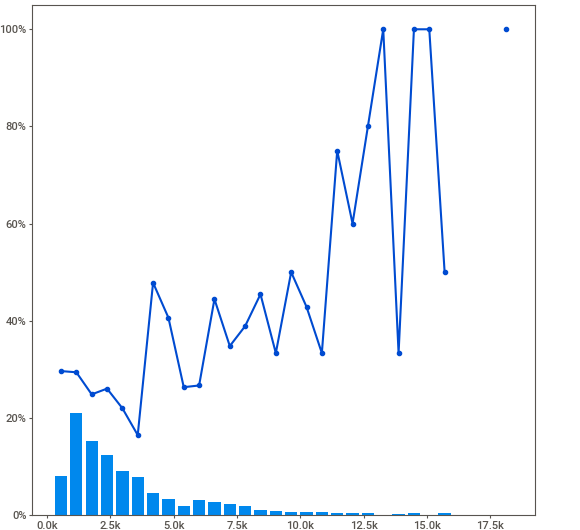
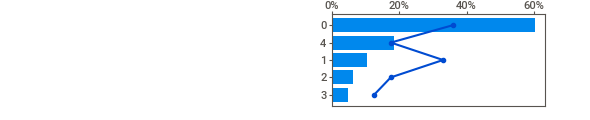
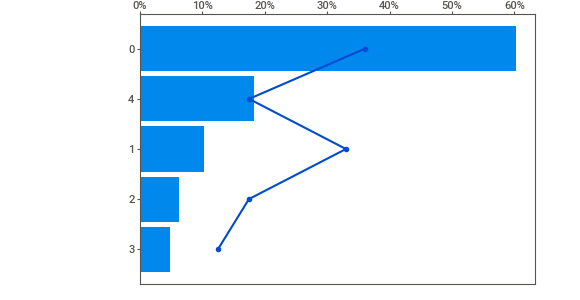
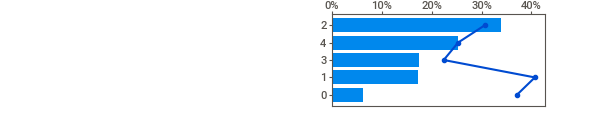
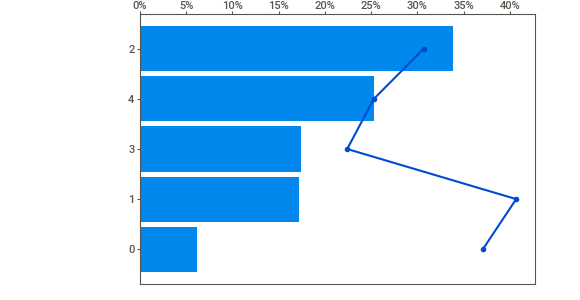
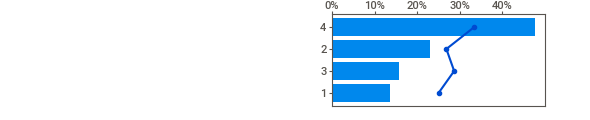
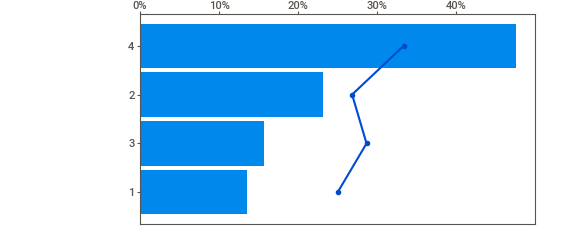
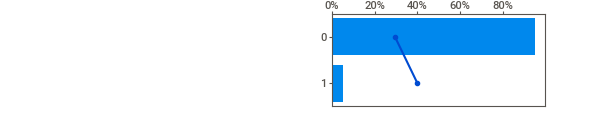
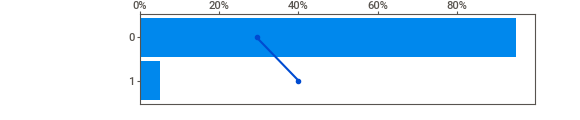
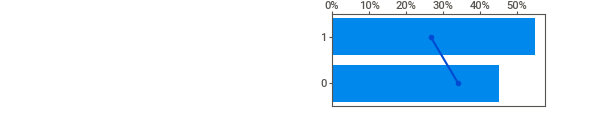
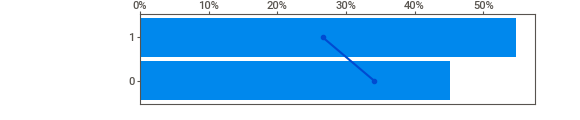
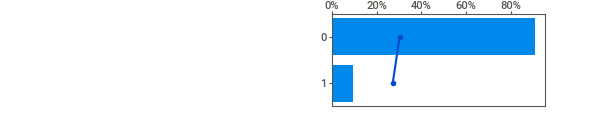
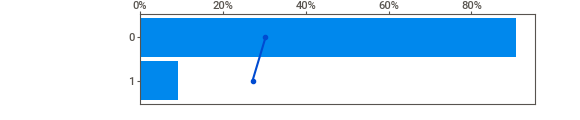
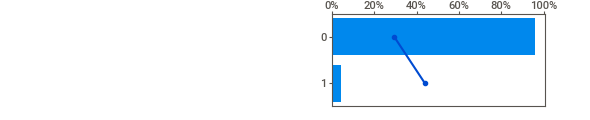
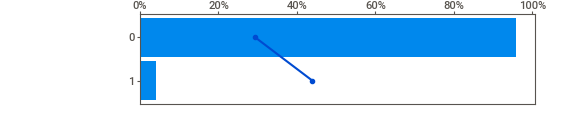
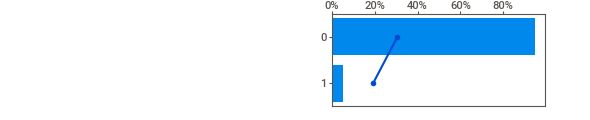
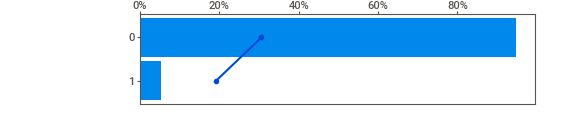
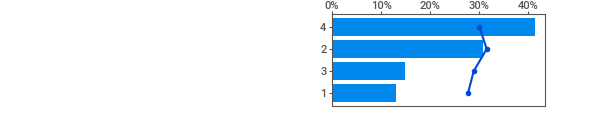
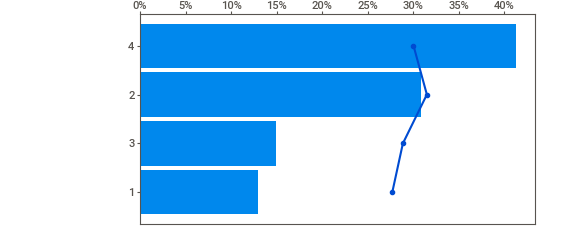
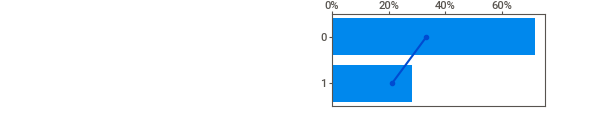
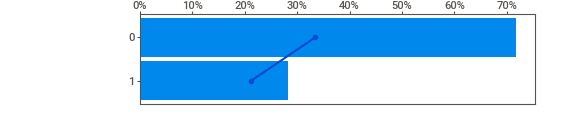
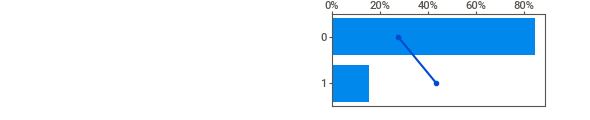
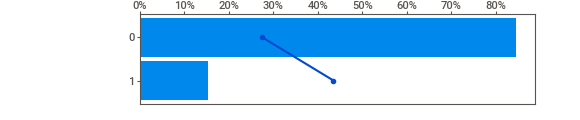
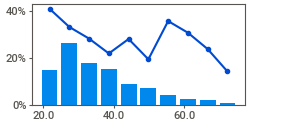
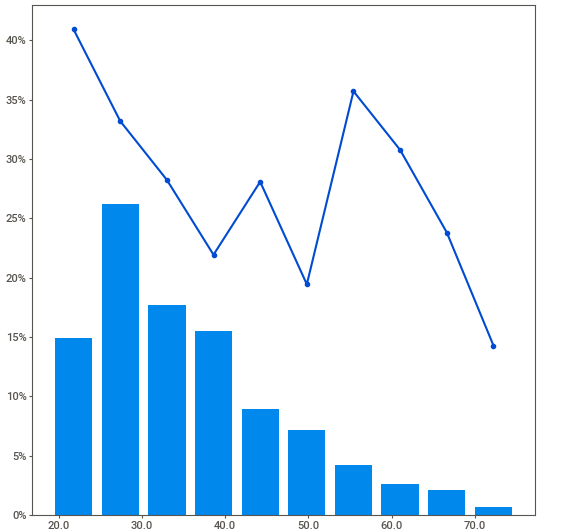
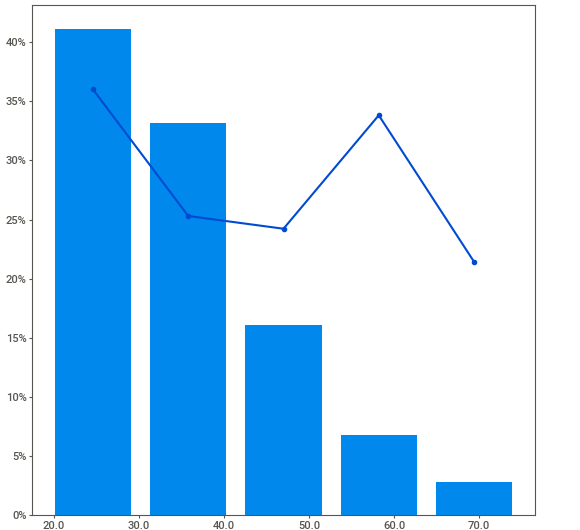
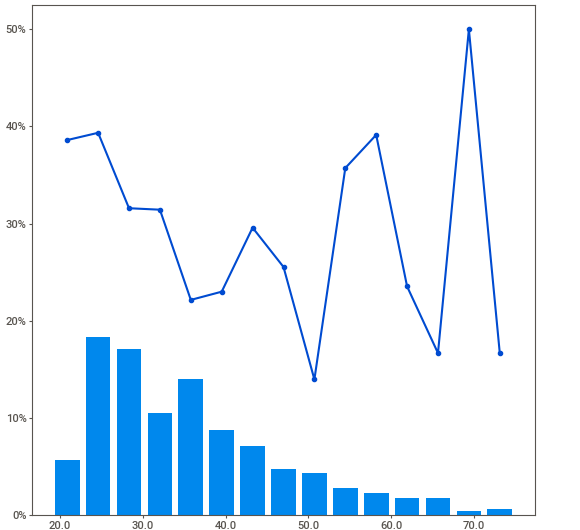
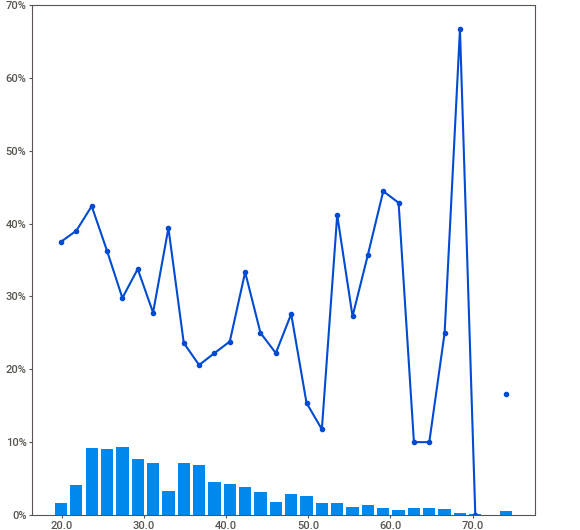
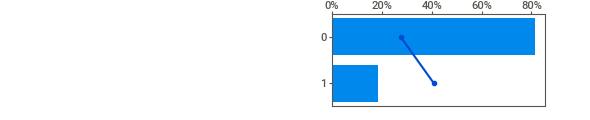
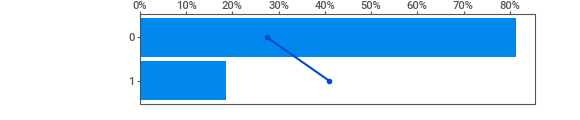
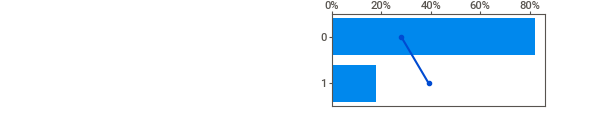
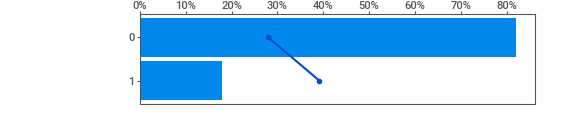
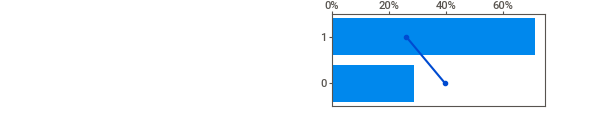
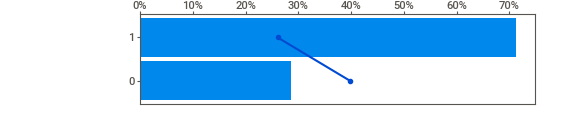
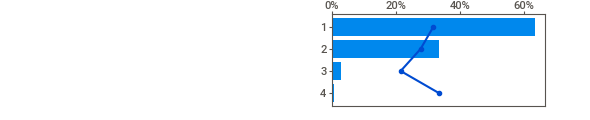
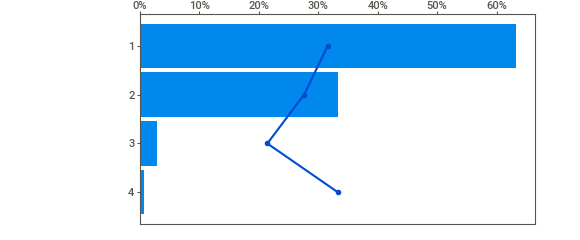
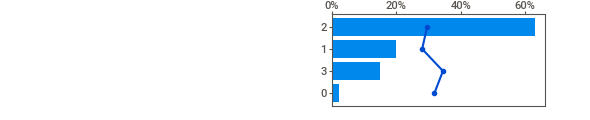
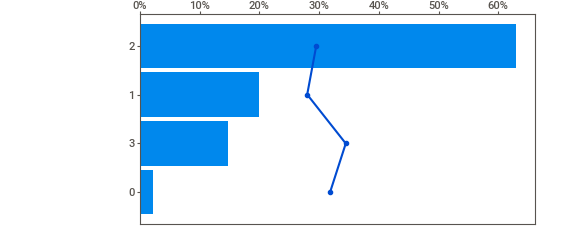
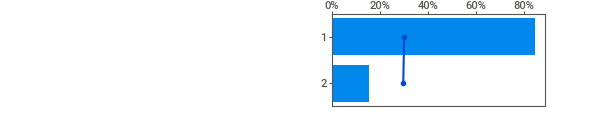
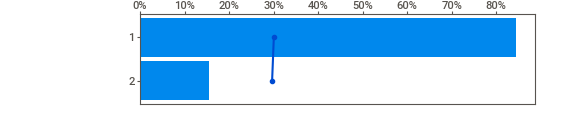
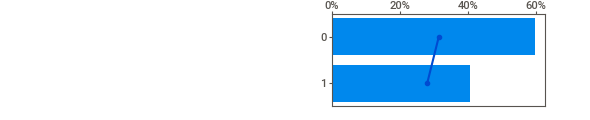
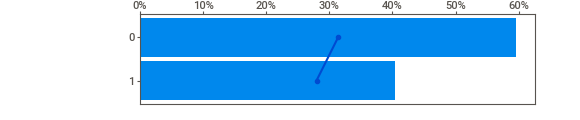
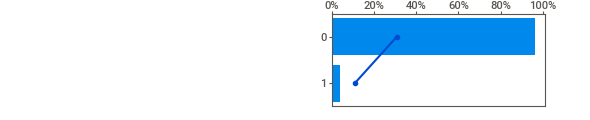
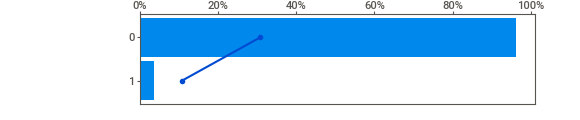
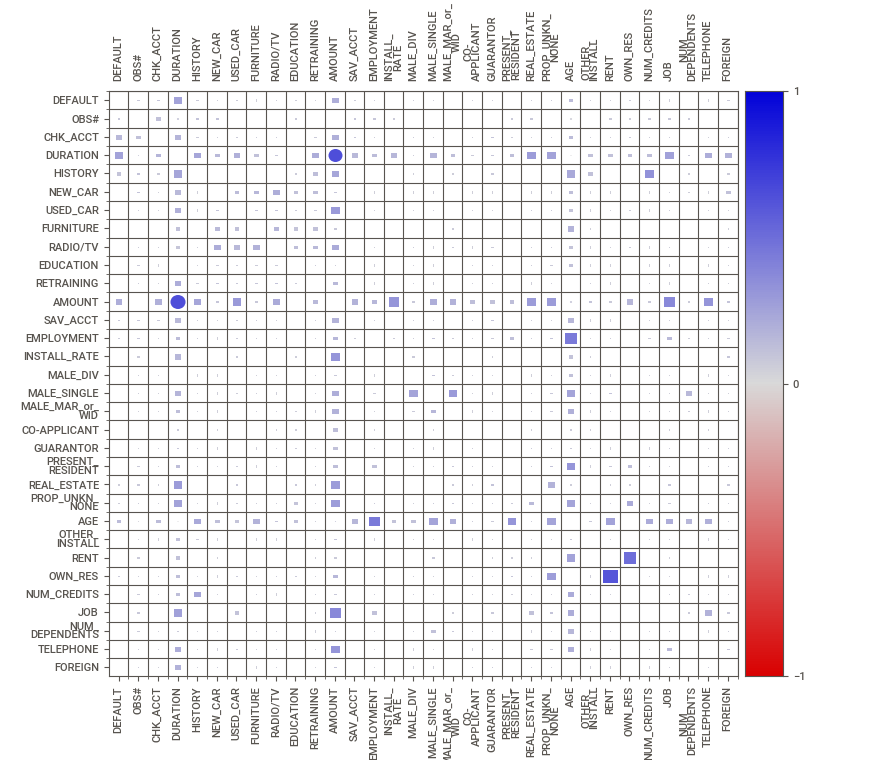
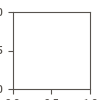

In [9]:
# Build a report using sweetviz
sv.analyze(df, target_feat='DEFAULT').show_notebook()

# Split data into train and test set

In [10]:
# Split target variable from features
X = df.iloc[:, :-1]
y = df['DEFAULT']

In [11]:
# Convert features to appropriate data types
X[cat_vars] = X[cat_vars].astype('category')
X[bool_vars] = X[bool_vars].astype('bool')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   OBS#              1000 non-null   int64   
 1   CHK_ACCT          1000 non-null   category
 2   DURATION          1000 non-null   int64   
 3   HISTORY           1000 non-null   category
 4   NEW_CAR           1000 non-null   bool    
 5   USED_CAR          1000 non-null   bool    
 6   FURNITURE         1000 non-null   bool    
 7   RADIO/TV          1000 non-null   bool    
 8   EDUCATION         1000 non-null   bool    
 9   RETRAINING        1000 non-null   bool    
 10  AMOUNT            1000 non-null   int64   
 11  SAV_ACCT          1000 non-null   category
 12  EMPLOYMENT        1000 non-null   category
 13  INSTALL_RATE      1000 non-null   int64   
 14  MALE_DIV          1000 non-null   bool    
 15  MALE_SINGLE       1000 non-null   bool    
 16  MALE_MAR_or_WID   1000 no


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [14]:
acc = accuracy_score(y_test, preds)
recall = recall_score(y_test, preds)
precision = precision_score(y_test, preds)
f1 = f1_score(y_test, preds)

In [15]:
metrics = {'accuracy: ': acc, 'recall: ': recall, 'precision: ': precision, 'f1: ': f1}
for k, v in metrics.items():
    print('Base LogReg Model ' + k, v)

Base LogReg Model accuracy:  0.72
Base LogReg Model recall:  0.4827586206896552
Base LogReg Model precision:  0.5185185185185185
Base LogReg Model f1:  0.5


At first glance, model accuracy looked good, however viewing other metrics you can see the accuracy is performing well by guessing due to class imbalance.

# Normalize data and get a new base model

In [16]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

In [19]:
acc = accuracy_score(y_test, preds)
recall = recall_score(y_test, preds)
precision = precision_score(y_test, preds)
f1 = f1_score(y_test, preds)

In [20]:
metrics = {'accuracy: ': acc, 'recall: ': recall, 'precision: ': precision, 'f1: ': f1}
for k, v in metrics.items():
    print('Base LogReg Model ' + k, v)

Base LogReg Model accuracy:  0.755
Base LogReg Model recall:  0.5862068965517241
Base LogReg Model precision:  0.576271186440678
Base LogReg Model f1:  0.5811965811965812


With normalizing the data we see a slight improvement all around. However, the results are still not very good.

# Apply boostrapping to see if that improves the model

In [21]:
# Bootstrap sampmles
n_samples = 1000

# Initialize lists for bootstrap metrics
bootstrap_accuracy = []
bootstrap_recall = []
bootstrap_precision = []
bootstrap_f1 = []

In [22]:
for i in range(n_samples):
    X_boot, y_boot = resample(X_train, y_train, replace=True)
    
    clf.fit(X_boot, y_boot)
    preds = clf.predict(X_test)
    
    acc = accuracy_score(y_test, preds)
    recall = recall_score(y_test, preds)
    precision = precision_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    
    bootstrap_accuracy.append(acc)
    bootstrap_recall.append(recall)
    bootstrap_precision.append(precision)
    bootstrap_f1.append(f1)

In [23]:
mean_acc = np.mean(bootstrap_accuracy)
std_acc = np.std(bootstrap_accuracy)
mean_recall = np.mean(bootstrap_recall)
std_recall = np.std(bootstrap_recall)
mean_precision = np.mean(bootstrap_precision)
std_precision = np.std(bootstrap_precision)
mean_f1 = np.mean(bootstrap_f1)
std_f1 = np.std(bootstrap_f1)

In [24]:
print(f'Mean accuracy: {mean_acc}')
print(f'Standard deviation accuracy: {std_acc}')
print(f'Mean recall: {mean_recall}')
print(f'Standard deviation recall: {std_recall}')
print(f'Mean precision: {mean_precision}')
print(f'Standard deviation precision: {std_precision}')
print(f'Mean f1: {mean_f1}')
print(f'Standard deviation f1: {std_f1}')

Mean accuracy: 0.744385
Standard deviation accuracy: 0.015514405402721705
Mean recall: 0.546655172413793
Standard deviation recall: 0.04974836800243867
Mean precision: 0.5613690001387563
Standard deviation precision: 0.028514613077219426
Mean f1: 0.5528244115967588
Standard deviation f1: 0.03328336467355759


# Feature Engineering

In [25]:
# Bin ages
bins = [18, 25, 30, 35, 40, 45, 50, 55, 60, 65, 100]
df['AgeBin'] = pd.cut(df['AGE'], bins=bins)
df['AgeBin']

0      (65, 100]
1       (18, 25]
2       (45, 50]
3       (40, 45]
4       (50, 55]
         ...    
995     (30, 35]
996     (35, 40]
997     (35, 40]
998     (18, 25]
999     (25, 30]
Name: AgeBin, Length: 1000, dtype: category
Categories (10, interval[int64, right]): [(18, 25] < (25, 30] < (30, 35] < (35, 40] ... (50, 55] < (55, 60] < (60, 65] < (65, 100]]

In [26]:
avg_age = df.groupby('AgeBin')['AMOUNT'].mean().round(2)
avg_age

AgeBin
(18, 25]     3003.36
(25, 30]     3321.50
(30, 35]     3270.21
(35, 40]     3339.07
(40, 45]     3829.06
(45, 50]     2979.14
(50, 55]     3070.33
(55, 60]     3964.15
(60, 65]     2787.11
(65, 100]    3624.50
Name: AMOUNT, dtype: float64

In [27]:
# Average balance based by age group
df = df.set_index('AgeBin')
df['AvgBal'] = avg_age
df = df.reset_index()
df.head()

,AgeBin,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,...,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,DEFAULT,AvgBal
0,"(65, 100]",1,0,6,4,0,0,0,1,0,...,0,0,1,2,2,1,1,0,0,3624.50
1,"(18, 25]",2,1,48,2,0,0,0,1,0,...,0,0,1,1,2,1,0,0,1,3003.36
2,"(45, 50]",3,3,12,4,0,0,0,0,1,...,0,0,1,1,1,2,0,0,0,2979.14
3,"(40, 45]",4,0,42,2,0,0,1,0,0,...,0,0,0,1,2,2,0,0,0,3829.06
4,"(50, 55]",5,0,24,3,1,0,0,0,0,...,0,0,0,2,2,2,0,0,1,3070.33


In [28]:
# Create Total Credit feature
df['TotCred'] = df['AMOUNT'] * df['NUM_CREDITS']
df

,AgeBin,OBS#,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,...,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,DEFAULT,AvgBal,TotCred
0,"(65, 100]",1,0,6,4,0,0,0,1,0,...,0,1,2,2,1,1,0,0,3624.50,2338
1,"(18, 25]",2,1,48,2,0,0,0,1,0,...,0,1,1,2,1,0,0,1,3003.36,5951
2,"(45, 50]",3,3,12,4,0,0,0,0,1,...,0,1,1,1,2,0,0,0,2979.14,2096
3,"(40, 45]",4,0,42,2,0,0,1,0,0,...,0,0,1,2,2,0,0,0,3829.06,7882
4,"(50, 55]",5,0,24,3,1,0,0,0,0,...,0,0,2,2,2,0,0,1,3070.33,9740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"(30, 35]",996,3,12,2,0,0,1,0,0,...,0,1,1,1,1,0,0,0,3270.21,1736
996,"(35, 40]",997,0,30,2,0,1,0,0,0,...,0,1,1,3,1,1,0,0,3339.07,3857
997,"(35, 40]",998,3,12,2,0,0,0,1,0,...,0,1,1,2,1,0,0,0,3339.07,804
998,"(18, 25]",999,0,45,2,0,0,0,1,0,...,0,0,1,2,1,1,0,1,3003.36,1845


In [29]:
# Total lines of credit
df['LinesofCredit'] = df['NEW_CAR'] + df['USED_CAR'] + df['FURNITURE'] + df['RADIO/TV'] + df['EDUCATION'] + df['RETRAINING']

In [30]:
df['LinesofCredit'].value_counts()

LinesofCredit
1    945
0     55
Name: count, dtype: int64

# Retrain model with new features

In [31]:
# Split target variable from features
X = df.iloc[:, :-1]
y = df['DEFAULT']

In [32]:
# Drop OBS# column
X.drop(columns='OBS#', inplace=True)
features = X.columns

In [33]:
# Convert features to appropriate data types
X[cat_vars] = X[cat_vars].astype('category')
X[bool_vars] = X[bool_vars].astype('bool')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   AgeBin            1000 non-null   category
 1   CHK_ACCT          1000 non-null   category
 2   DURATION          1000 non-null   int64   
 3   HISTORY           1000 non-null   category
 4   NEW_CAR           1000 non-null   bool    
 5   USED_CAR          1000 non-null   bool    
 6   FURNITURE         1000 non-null   bool    
 7   RADIO/TV          1000 non-null   bool    
 8   EDUCATION         1000 non-null   bool    
 9   RETRAINING        1000 non-null   bool    
 10  AMOUNT            1000 non-null   int64   
 11  SAV_ACCT          1000 non-null   category
 12  EMPLOYMENT        1000 non-null   category
 13  INSTALL_RATE      1000 non-null   int64   
 14  MALE_DIV          1000 non-null   bool    
 15  MALE_SINGLE       1000 non-null   bool    
 16  MALE_MAR_or_WID   1000 no

In [34]:
# OneHot Encode Age Bin feature
enc = OneHotEncoder()
X = pd.get_dummies(X, columns=['AgeBin'])
X

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,"AgeBin_(18, 25]","AgeBin_(25, 30]","AgeBin_(30, 35]","AgeBin_(35, 40]","AgeBin_(40, 45]","AgeBin_(45, 50]","AgeBin_(50, 55]","AgeBin_(55, 60]","AgeBin_(60, 65]","AgeBin_(65, 100]"
0,0,6,4,False,False,False,True,False,False,1169,...,False,False,False,False,False,False,False,False,False,True
1,1,48,2,False,False,False,True,False,False,5951,...,True,False,False,False,False,False,False,False,False,False
2,3,12,4,False,False,False,False,True,False,2096,...,False,False,False,False,False,True,False,False,False,False
3,0,42,2,False,False,True,False,False,False,7882,...,False,False,False,False,True,False,False,False,False,False
4,0,24,3,True,False,False,False,False,False,4870,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,2,False,False,True,False,False,False,1736,...,False,False,True,False,False,False,False,False,False,False
996,0,30,2,False,True,False,False,False,False,3857,...,False,False,False,True,False,False,False,False,False,False
997,3,12,2,False,False,False,True,False,False,804,...,False,False,False,True,False,False,False,False,False,False
998,0,45,2,False,False,False,True,False,False,1845,...,True,False,False,False,False,False,False,False,False,False


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

In [37]:
acc = accuracy_score(y_test, preds)
recall = recall_score(y_test, preds)
precision = precision_score(y_test, preds)
f1 = f1_score(y_test, preds)

In [38]:
metrics = {'accuracy: ': acc, 'recall: ': recall, 'precision: ': precision, 'f1: ': f1}
for k, v in metrics.items():
    print('Feature Engineered LogReg Model ' + k, v)

Feature Engineered LogReg Model accuracy:  1.0
Feature Engineered LogReg Model recall:  1.0
Feature Engineered LogReg Model precision:  1.0
Feature Engineered LogReg Model f1:  1.0


# View SHAP plot

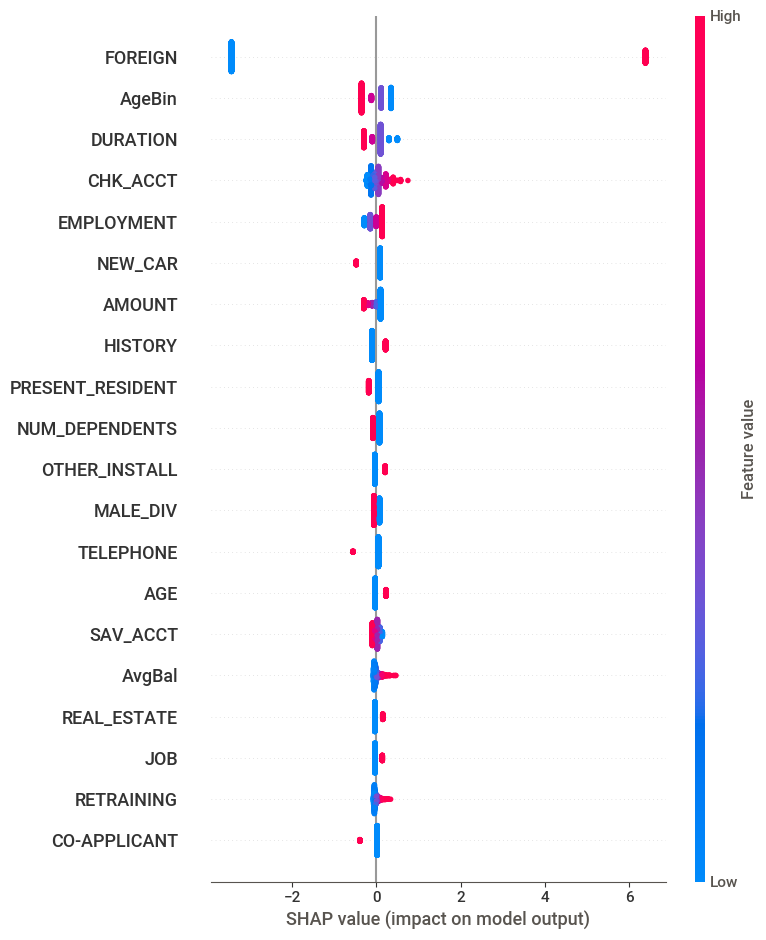

In [39]:
explainer = shap.Explainer(clf, X_train)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train, feature_names=features)

# Plotting Learning Curve to assess overfitting

In [40]:
train_sizes = np.linspace(0.1, 1.0, 10)

train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=5, train_sizes=train_sizes)

In [41]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

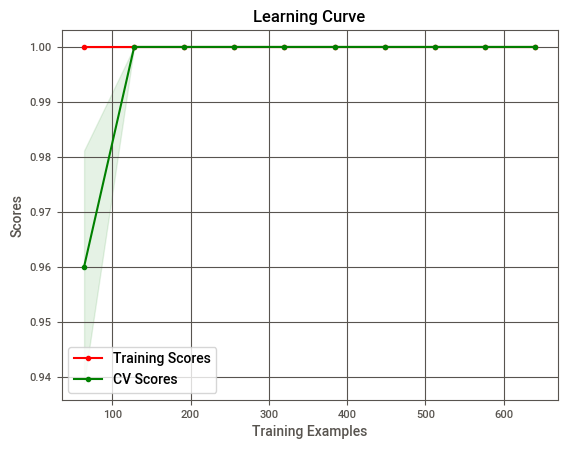

In [45]:
plt.figure()
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Scores')
plt.grid()

plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Scores')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='CV Scores')

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')

plt.legend(loc='best')
plt.savefig('learning_curve.png')

Learning curve is showing training and testing scores to converge. Overfitting would show divergence of these two.